In [1]:
#import the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
temp=pd.read_excel('cluster.xlsx')
temp

,x,y
0,12,39
1,20,39
2,28,30
3,18,52
4,29,54
5,33,46
6,24,55
7,45,59
8,45,63
9,52,70


In [3]:
temp.head(2)

,x,y
0,12,39
1,20,39


In [4]:
df=temp[['x','y']]
print(df.head())
print(df.shape)

    x   y
0  12  39
1  20  39
2  28  30
3  18  52
4  29  54
(19, 2)


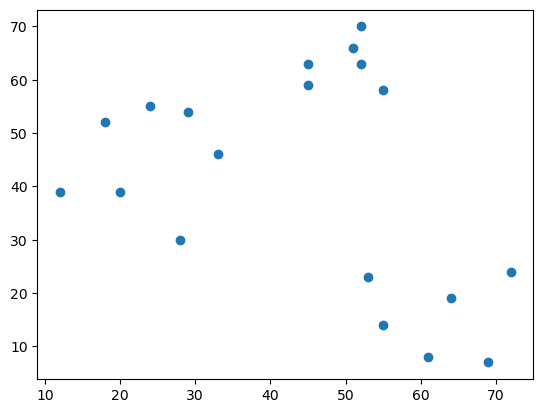

In [5]:
plt.scatter(df['x'],df['y'])

# Step 1 : Select random points as centroids

In [6]:
#k=3
np.random.seed(200)
k=3
centroids={i+1:[np.random.randint(0,80),
 np.random.randint(0,80)] for i in range(k)}
print(centroids)
print(type(centroids))


{1: [26, 16], 2: [68, 42], 3: [55, 76]}
<class 'dict'>


26 16 <class 'dict'>
68 42 <class 'dict'>
55 76 <class 'dict'>


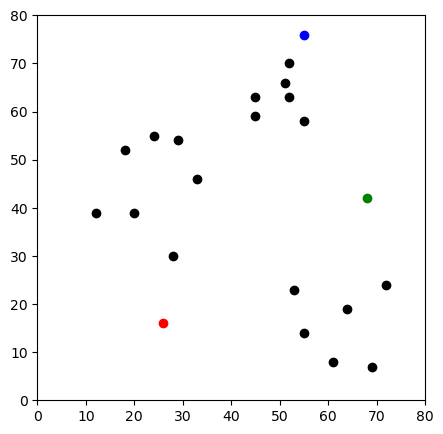

In [7]:
#Plot the datapoints
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color='k')
colmap={1:'r',2:'g',3:'b'}
#plot the centroids
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
    print(*centroids[i],type(centroids))
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()


# Step 2: Compute distance & assign the data points to the closest centroid

In [8]:
import numpy as np
def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = np.sqrt((df['x'] - centroids[i][0])**2 + (df['y'] - centroids[i][1])**2)

    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids]

    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])

    return df

df = assignment(df, centroids)
print(df)


     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        26.925824        56.080300        56.727418        1     r
1   20  39        23.769729        48.093659        50.931326        1     r
2   28  30        14.142136        41.761226        53.338541        1     r
3   18  52        36.878178        50.990195        44.102154        1     r
4   29  54        38.118237        40.804412        34.058773        3     b
5   33  46        30.805844        35.227830        37.202150        1     r
6   24  55        39.051248        45.880279        37.443290        3     b
7   45  59        47.010637        28.600699        19.723083        3     b
8   45  63        50.695167        31.144823        16.401219        3     b
9   52  70        59.933296        32.249031         6.708204        3     b
10  51  66        55.901699        29.410882        10.770330        3     b
11  52  63        53.712196        26.400758        13.341664        3     b

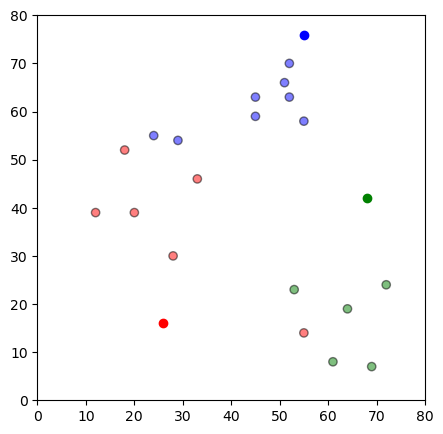

In [9]:
#Plot the datapoints
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()


# Step 3 : Update the centroids to avoid miss-grouped data points

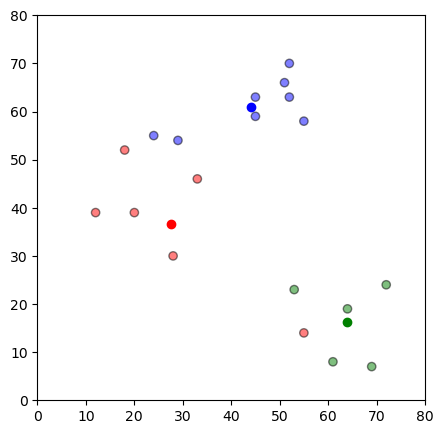

In [10]:
import copy
old_centroids=copy.deepcopy(centroids)
def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][1]=np.mean(df[df['closest']==i]['y'])
 
    return k
centroids=update(centroids)
#Plot the datapoints
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

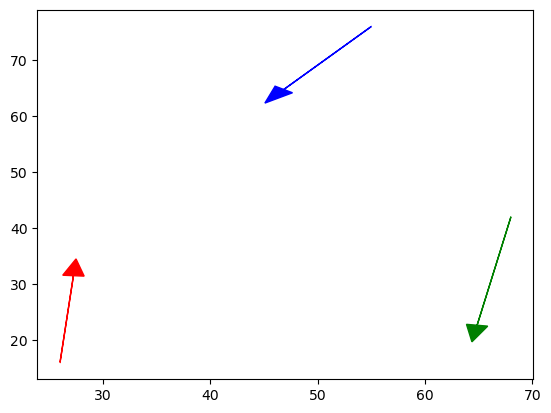

In [11]:
ax = plt.axes()
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75

    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])

    

# Repeat the distance compute method

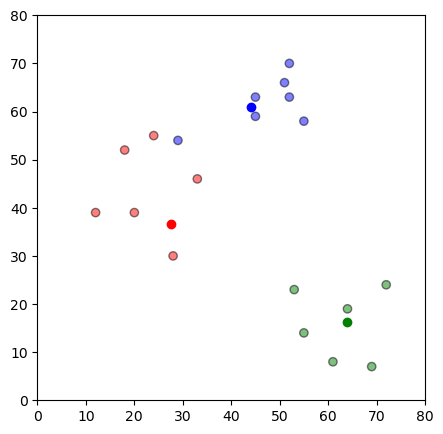

In [12]:
df=assignment(df,centroids)
#Plot the datapoints
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()


     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        11.423660        55.408834        41.802500        1     r
1   20  39         5.147815        48.257699        35.375825        1     r
2   28  30        14.577380        37.141247        37.092823        1     r
3   18  52         9.617692        57.214266        30.629451        1     r
4   29  54        12.349089        50.673519        19.640130        1     r
5   33  46        10.793517        42.076980        21.152990        1     r
6   24  55        11.597414        54.803943        24.000425        1     r
7   45  59        27.322152        46.516723         3.487587        3     b
8   45  63        29.774150        50.250760         2.303502        3     b
9   52  70        39.654760        55.143500         9.555424        3     b
10  51  66        36.311155        51.430914         5.758756        3     b
11  52  63        35.362409        48.285321         5.128949        3     b

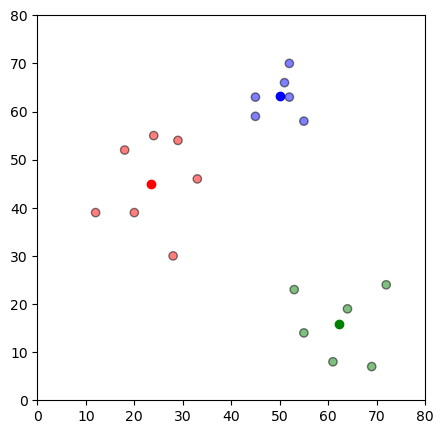

In [13]:
#update the centroid again
while True:
    closest_centroids=df['closest'].copy(deep=True)
    centroids=update(centroids)
    df=assignment(df,centroids)
    print(df)
 
    if closest_centroids.equals(df['closest']):
        break
        
#Plot the datapoints
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()